In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from numpy import array
from numpy import hstack

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


# 1.Reading & Merging data

In [0]:
import time
from time import mktime
from datetime import datetime

In [0]:
pip install dateparser

     |████████████████████████████████| 358kB 2.8MB/s 


In [0]:
import dateparser

## 1.1 Reading data

### 1.1.1 Reading rt prices

In [0]:
rt_prices = pd.read_csv("gdrive/My Drive/Deep learning/rt_prices.csv", parse_dates=['dates'])
rt_prices

,dates,SMECO_RESID_AGG..RTLMP..Average,DOM_RESID_AGG..RTLMP..Average,AEPKY_RESID_AGG..RTLMP..Average
0,2018-01-28 01:00:00,22.02,21.98,21.98
1,2018-01-28 02:00:00,21.68,21.64,21.66
2,2018-01-28 03:00:00,21.13,21.12,21.21
3,2018-01-28 04:00:00,21.22,21.23,21.39
4,2018-01-28 05:00:00,21.74,21.77,21.93
...,...,...,...,...
16866,2019-12-31 20:00:00,19.15,18.98,19.38
16867,2019-12-31 21:00:00,18.96,18.99,19.55
16868,2019-12-31 22:00:00,18.65,18.74,19.38
16869,2019-12-31 23:00:00,18.18,18.17,18.47


### 1.1.2 Reading dam prices

In [0]:
dam_prices = pd.read_csv("gdrive/My Drive/Deep learning/dam_prices.csv", parse_dates=['dates'])
dam_prices

,dates,SMECO_RESID_AGG..DALMP..Average,DOM_RESID_AGG..DALMP..Average,AEPKY_RESID_AGG..DALMP..Average
0,2018-01-28 01:00:00,23.49,23.33,22.60
1,2018-01-28 02:00:00,22.85,22.73,22.17
2,2018-01-28 03:00:00,22.27,22.24,21.74
3,2018-01-28 04:00:00,22.30,22.28,21.78
4,2018-01-28 05:00:00,22.44,22.43,21.95
...,...,...,...,...
16866,2019-12-31 20:00:00,27.82,27.08,27.06
16867,2019-12-31 21:00:00,25.08,24.52,24.86
16868,2019-12-31 22:00:00,23.28,22.69,22.99
16869,2019-12-31 23:00:00,20.30,19.85,20.27


### 1.1.3 Reading features data

In [0]:
feature = pd.read_csv("gdrive/My Drive/Deep learning/features.csv", parse_dates=['dates'])
feature['indice']=feature.index
feature

,dates,Gas.price,MidAtl_Pool_pr,western_Pool_prev,Total_Pool_prev,Percent.diff.MidAtl_Pool_pr,Percent.diff.western_Pool_prev,Percent.diff.Total_Pool_prev,PJM.POOL.J2,MISO_POOL_J2,indice
0,2018-01-28 01:00:00,3.100,27860.0,42874.0,80540.0,-0.047554,-0.045293,-0.048957,2011.0,4258.0,0
1,2018-01-28 02:00:00,3.100,26049.0,41410.0,76483.0,-0.065004,-0.034147,-0.050372,1719.0,4040.0,1
2,2018-01-28 03:00:00,3.100,25135.0,40372.0,74227.0,-0.035088,-0.025066,-0.029497,1826.0,3747.0,2
3,2018-01-28 04:00:00,3.100,24647.0,39719.0,72922.0,-0.019415,-0.016175,-0.017581,1733.0,3651.0,3
4,2018-01-28 05:00:00,3.100,24458.0,39502.0,72509.0,-0.007668,-0.005463,-0.005664,1460.0,3543.0,4
...,...,...,...,...,...,...,...,...,...,...,...
16866,2019-12-31 20:00:00,1.935,34347.0,49546.0,95946.0,-0.011326,-0.022184,-0.015921,2116.0,6831.0,16866
16867,2019-12-31 21:00:00,1.935,33626.0,49371.0,94931.0,-0.020983,-0.003520,-0.010579,2134.0,6542.0,16867
16868,2019-12-31 22:00:00,1.935,32335.0,48197.0,92016.0,-0.038397,-0.023783,-0.030706,2152.0,6280.0,16868
16869,2019-12-31 23:00:00,1.935,30628.0,46563.0,88286.0,-0.052795,-0.033892,-0.040536,2171.0,6017.0,16869


## 1.2 Merging data 

In [0]:
df= pd.merge(dam_prices.set_index(['dates']), feature.set_index(['dates']), left_index=True, right_index=True,how='inner')
df= pd.merge(rt_prices.set_index(['dates']), df, left_index=True, right_index=True,how='inner')
df

,SMECO_RESID_AGG..RTLMP..Average,DOM_RESID_AGG..RTLMP..Average,AEPKY_RESID_AGG..RTLMP..Average,SMECO_RESID_AGG..DALMP..Average,DOM_RESID_AGG..DALMP..Average,AEPKY_RESID_AGG..DALMP..Average,Gas.price,MidAtl_Pool_pr,western_Pool_prev,Total_Pool_prev,Percent.diff.MidAtl_Pool_pr,Percent.diff.western_Pool_prev,Percent.diff.Total_Pool_prev,PJM.POOL.J2,MISO_POOL_J2,indice
dates,,,,,,,,,,,,,,,,
2018-01-28 01:00:00,22.02,21.98,21.98,23.49,23.33,22.60,3.100,27860.0,42874.0,80540.0,-0.047554,-0.045293,-0.048957,2011.0,4258.0,0
2018-01-28 02:00:00,21.68,21.64,21.66,22.85,22.73,22.17,3.100,26049.0,41410.0,76483.0,-0.065004,-0.034147,-0.050372,1719.0,4040.0,1
2018-01-28 03:00:00,21.13,21.12,21.21,22.27,22.24,21.74,3.100,25135.0,40372.0,74227.0,-0.035088,-0.025066,-0.029497,1826.0,3747.0,2
2018-01-28 04:00:00,21.22,21.23,21.39,22.30,22.28,21.78,3.100,24647.0,39719.0,72922.0,-0.019415,-0.016175,-0.017581,1733.0,3651.0,3
2018-01-28 05:00:00,21.74,21.77,21.93,22.44,22.43,21.95,3.100,24458.0,39502.0,72509.0,-0.007668,-0.005463,-0.005664,1460.0,3543.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 20:00:00,19.15,18.98,19.38,27.82,27.08,27.06,1.935,34347.0,49546.0,95946.0,-0.011326,-0.022184,-0.015921,2116.0,6831.0,16866
2019-12-31 21:00:00,18.96,18.99,19.55,25.08,24.52,24.86,1.935,33626.0,49371.0,94931.0,-0.020983,-0.003520,-0.010579,2134.0,6542.0,16867
2019-12-31 22:00:00,18.65,18.74,19.38,23.28,22.69,22.99,1.935,32335.0,48197.0,92016.0,-0.038397,-0.023783,-0.030706,2152.0,6280.0,16868


In [0]:
## start_event=datetime.strptime(str(feature.iloc[:,'dates']),'%m/%d/%Y %H:%M:%S %p')

# 2.Exploring data 

## 2.1 Correlations among features

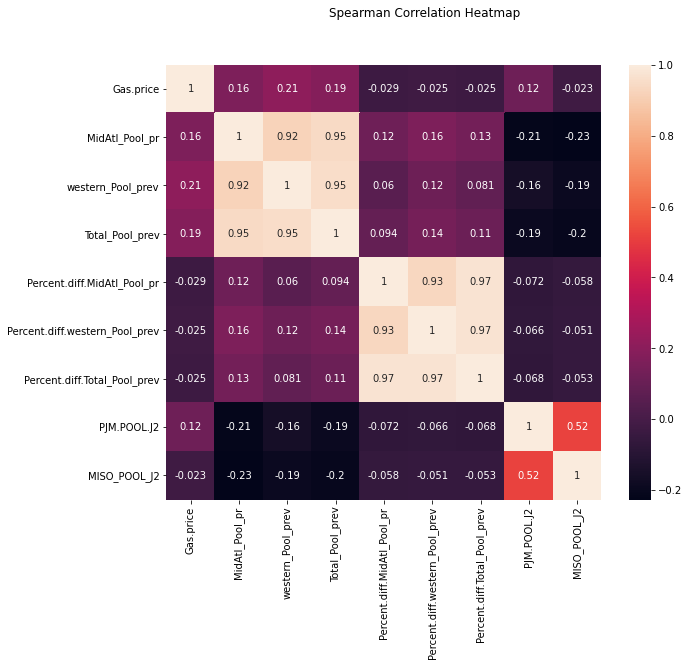

In [0]:
pd.set_option('precision',2)
plt.figure(figsize=(10, 8))
sns.heatmap(feature.drop(['dates','indice'],axis=1).corr(method='spearman'), square=True, annot=True)
plt.suptitle("Spearman Correlation Heatmap")
plt.show();

## 2.2 Correlation with the target

### 2.2.1 SMECO_RESID_DA

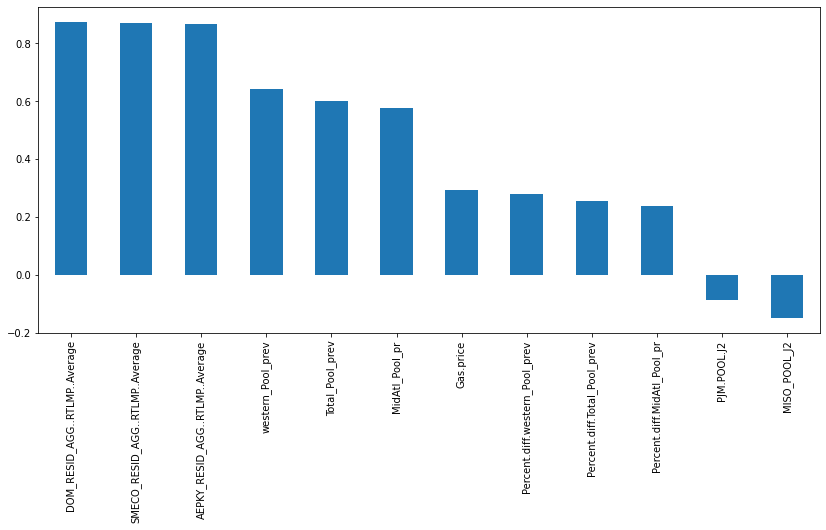

In [0]:
corr_with_price = df.drop(columns=['indice','DOM_RESID_AGG..DALMP..Average','AEPKY_RESID_AGG..DALMP..Average' ]).corr(method='spearman')["SMECO_RESID_AGG..DALMP..Average"].sort_values(ascending=False)
plt.figure(figsize=(14,6))
corr_with_price.drop("SMECO_RESID_AGG..DALMP..Average").plot.bar()
plt.show();

### 2.2.2 DOM_RESID_DA

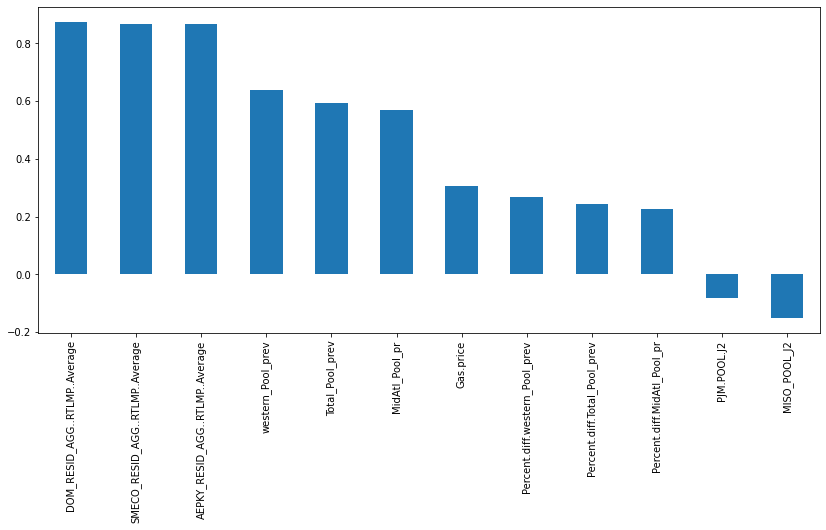

In [0]:
corr_with_price = df.drop(columns=['indice','SMECO_RESID_AGG..DALMP..Average','AEPKY_RESID_AGG..DALMP..Average' ]).corr(method='spearman')["DOM_RESID_AGG..DALMP..Average"].sort_values(ascending=False)
plt.figure(figsize=(14,6))
corr_with_price.drop("DOM_RESID_AGG..DALMP..Average").plot.bar()
plt.show();

### 2.2.3 AEPKY_RESID_DA

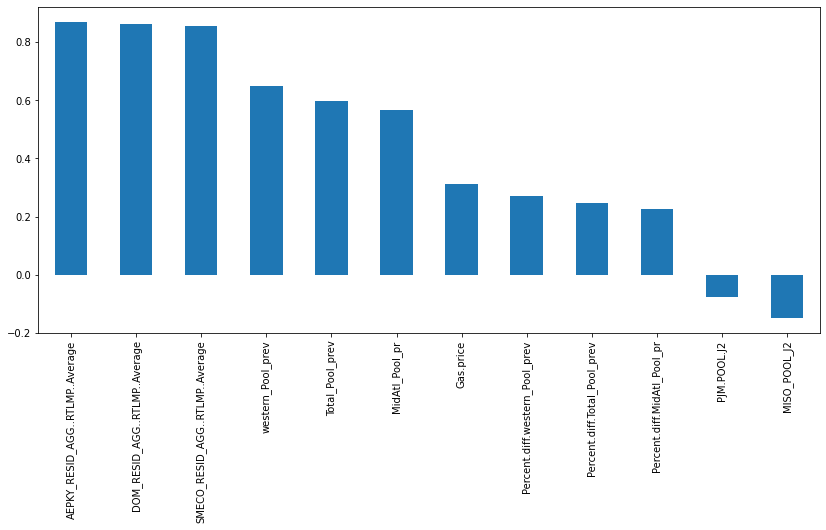

In [0]:
corr_with_price = df.drop(columns=['indice','DOM_RESID_AGG..DALMP..Average','SMECO_RESID_AGG..DALMP..Average' ]).corr(method='spearman')["AEPKY_RESID_AGG..DALMP..Average"].sort_values(ascending=False)
plt.figure(figsize=(14,6))
corr_with_price.drop("AEPKY_RESID_AGG..DALMP..Average").plot.bar()
plt.show();

## 2.3 Plotting the data

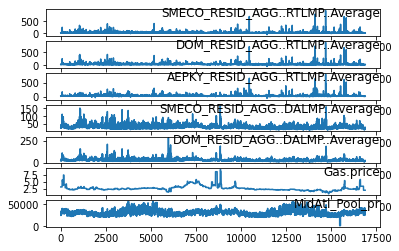

In [0]:
from matplotlib import pyplot
# load dataset
#dataset = read_csv('pollution.csv', header=0, index_col=0)
values = df.values
# specify columns to plot
groups = [0, 1, 2, 3, 4,6,7]
i = 1
# plot each column
pyplot.figure()
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(df.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()

# 3.Model Training & Performance

In [0]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import requests
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, make_scorer

from keras.models import Sequential
from keras.layers import Dense, LSTM

Using TensorFlow backend.


In [0]:
scaler= MinMaxScaler()

## 3.1 Data preparation

### 3.1.1 Code for data preparation 

In [0]:
from pandas import DataFrame
from pandas import concat
 
def series_to_supervised(data,col_names, n_in=1, n_out=1, dropnan=True):
	"""
	Frame a time series as a supervised learning dataset.
	Arguments:
		data: Sequence of observations as a list or NumPy array.
    col_names: comuns names 
		n_in: Number of lag observations as input (X).
		n_out: Number of observations as output (y).
		dropnan: Boolean whether or not to drop rows with NaN values.
	Returns:
		Pandas DataFrame of series framed for supervised learning.
	"""
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('%s(t-%d)' % (col_names[j], i)) for j in range(n_vars)] #[('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('%s(t)' % (col_names[j])) for j in range(n_vars)] ##[('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names +=[('%s(t+%d)' % (col_names[j], i)) for j in range(n_vars)] ##[('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 

### 3.1.2 Features and target 

In [0]:
#set the column we want to predict (demand) to the first columns for consistency
cols = list(df.columns)
#variables=['SMECO_RESID_AGG..DALMP..Average','DOM_RESID_AGG..DALMP..Average', 'AEPKY_RESID_AGG..DALMP..Average']
#cols=map(cols.remove,[2,3,7])
#cols.remove(variables)
#cols.insert(0,variables)
df = df[cols]

values = df.values
# ensure all data is float
#values = values.astype('float32')
# frame as supervised learning
df_lag = series_to_supervised(values,df.columns, 24,24, True)
#df_lag['indice']= df_lag['indice(t)'].astype(int)
df_lag


,SMECO_RESID_AGG..RTLMP..Average(t-24),DOM_RESID_AGG..RTLMP..Average(t-24),AEPKY_RESID_AGG..RTLMP..Average(t-24),SMECO_RESID_AGG..DALMP..Average(t-24),DOM_RESID_AGG..DALMP..Average(t-24),AEPKY_RESID_AGG..DALMP..Average(t-24),Gas.price(t-24),MidAtl_Pool_pr(t-24),western_Pool_prev(t-24),Total_Pool_prev(t-24),Percent.diff.MidAtl_Pool_pr(t-24),Percent.diff.western_Pool_prev(t-24),Percent.diff.Total_Pool_prev(t-24),PJM.POOL.J2(t-24),MISO_POOL_J2(t-24),indice(t-24),SMECO_RESID_AGG..RTLMP..Average(t-23),DOM_RESID_AGG..RTLMP..Average(t-23),AEPKY_RESID_AGG..RTLMP..Average(t-23),SMECO_RESID_AGG..DALMP..Average(t-23),DOM_RESID_AGG..DALMP..Average(t-23),AEPKY_RESID_AGG..DALMP..Average(t-23),Gas.price(t-23),MidAtl_Pool_pr(t-23),western_Pool_prev(t-23),Total_Pool_prev(t-23),Percent.diff.MidAtl_Pool_pr(t-23),Percent.diff.western_Pool_prev(t-23),Percent.diff.Total_Pool_prev(t-23),PJM.POOL.J2(t-23),MISO_POOL_J2(t-23),indice(t-23),SMECO_RESID_AGG..RTLMP..Average(t-22),DOM_RESID_AGG..RTLMP..Average(t-22),AEPKY_RESID_AGG..RTLMP..Average(t-22),SMECO_RESID_AGG..DALMP..Average(t-22),DOM_RESID_AGG..DALMP..Average(t-22),AEPKY_RESID_AGG..DALMP..Average(t-22),Gas.price(t-22),MidAtl_Pool_pr(t-22),...,western_Pool_prev(t+21),Total_Pool_prev(t+21),Percent.diff.MidAtl_Pool_pr(t+21),Percent.diff.western_Pool_prev(t+21),Percent.diff.Total_Pool_prev(t+21),PJM.POOL.J2(t+21),MISO_POOL_J2(t+21),indice(t+21),SMECO_RESID_AGG..RTLMP..Average(t+22),DOM_RESID_AGG..RTLMP..Average(t+22),AEPKY_RESID_AGG..RTLMP..Average(t+22),SMECO_RESID_AGG..DALMP..Average(t+22),DOM_RESID_AGG..DALMP..Average(t+22),AEPKY_RESID_AGG..DALMP..Average(t+22),Gas.price(t+22),MidAtl_Pool_pr(t+22),western_Pool_prev(t+22),Total_Pool_prev(t+22),Percent.diff.MidAtl_Pool_pr(t+22),Percent.diff.western_Pool_prev(t+22),Percent.diff.Total_Pool_prev(t+22),PJM.POOL.J2(t+22),MISO_POOL_J2(t+22),indice(t+22),SMECO_RESID_AGG..RTLMP..Average(t+23),DOM_RESID_AGG..RTLMP..Average(t+23),AEPKY_RESID_AGG..RTLMP..Average(t+23),SMECO_RESID_AGG..DALMP..Average(t+23),DOM_RESID_AGG..DALMP..Average(t+23),AEPKY_RESID_AGG..DALMP..Average(t+23),Gas.price(t+23),MidAtl_Pool_pr(t+23),western_Pool_prev(t+23),Total_Pool_prev(t+23),Percent.diff.MidAtl_Pool_pr(t+23),Percent.diff.western_Pool_prev(t+23),Percent.diff.Total_Pool_prev(t+23),PJM.POOL.J2(t+23),MISO_POOL_J2(t+23),indice(t+23)
24,22.02,21.98,21.98,23.49,23.33,22.60,3.100,27860.0,42874.0,80540.0,-0.047554,-0.045293,-0.048957,2011.0,4258.0,0.0,21.68,21.64,21.66,22.85,22.73,22.17,3.100,26049.0,41410.0,76483.0,-0.065004,-0.034147,-0.050372,1719.0,4040.0,1.0,21.13,21.12,21.21,22.27,22.24,21.74,3.100,25135.0,...,57441.0,106084.0,-0.015193,-0.010644,-0.012878,1670.0,2403.0,45.0,30.50,30.59,29.76,32.82,32.64,33.16,3.100,33900.0,55998.0,102752.0,-0.038652,-0.025121,-0.031409,1557.0,2622.0,46.0,24.90,24.90,24.77,29.71,29.64,30.50,3.100,31417.0,53054.0,96532.0,-0.073245,-0.052573,-0.060534,1488.0,2862.0,47.0
25,21.68,21.64,21.66,22.85,22.73,22.17,3.100,26049.0,41410.0,76483.0,-0.065004,-0.034147,-0.050372,1719.0,4040.0,1.0,21.13,21.12,21.21,22.27,22.24,21.74,3.100,25135.0,40372.0,74227.0,-0.035088,-0.025066,-0.029497,1826.0,3747.0,2.0,21.22,21.23,21.39,22.30,22.28,21.78,3.100,24647.0,...,55998.0,102752.0,-0.038652,-0.025121,-0.031409,1557.0,2622.0,46.0,24.90,24.90,24.77,29.71,29.64,30.50,3.100,31417.0,53054.0,96532.0,-0.073245,-0.052573,-0.060534,1488.0,2862.0,47.0,24.92,24.85,24.70,27.92,27.76,25.13,3.100,29859.0,50486.0,91845.0,-0.049591,-0.048404,-0.048554,1856.0,3664.0,48.0
26,21.13,21.12,21.21,22.27,22.24,21.74,3.100,25135.0,40372.0,74227.0,-0.035088,-0.025066,-0.029497,1826.0,3747.0,2.0,21.22,21.23,21.39,22.30,22.28,21.78,3.100,24647.0,39719.0,72922.0,-0.019415,-0.016175,-0.017581,1733.0,3651.0,3.0,21.74,21.77,21.93,22.44,22.43,21.95,3.100,24458.0,...,53054.0,96532.0,-0.073245,-0.052573,-0.060534,1488.0,2862.0,47.0,24.92,24.85,24.70,27.92,27.76,25.13,3.100,29859.0,50486.0,91845.0,-0.049591,-0.048404,-0.048554,1856.0,3664.0,48.0,24.56,24.56,24.42,27.47,27.37,24.42,3.100,28844.0,49

In [0]:
target=['SMECO_RESID_AGG..DALMP..Average(t)','DOM_RESID_AGG..DALMP..Average(t)','AEPKY_RESID_AGG..DALMP..Average(t)']
##target=['SMECO_RESID_AGG..RTLMP..Average(t)']
reframed = df_lag.loc[:,df_lag.columns.str.endswith('(t-24)')]
reframed = reframed.loc[:,~reframed.columns.str.endswith('indice(t-24)')]
reframed = reframed.loc[:,~reframed.columns.str.endswith('(t)')]
#reframed['indice(t)']=df_lag['indice(t)']
reframed[target]= df_lag[target]
reframed

,SMECO_RESID_AGG..RTLMP..Average(t-24),DOM_RESID_AGG..RTLMP..Average(t-24),AEPKY_RESID_AGG..RTLMP..Average(t-24),SMECO_RESID_AGG..DALMP..Average(t-24),DOM_RESID_AGG..DALMP..Average(t-24),AEPKY_RESID_AGG..DALMP..Average(t-24),Gas.price(t-24),MidAtl_Pool_pr(t-24),western_Pool_prev(t-24),Total_Pool_prev(t-24),Percent.diff.MidAtl_Pool_pr(t-24),Percent.diff.western_Pool_prev(t-24),Percent.diff.Total_Pool_prev(t-24),PJM.POOL.J2(t-24),MISO_POOL_J2(t-24),SMECO_RESID_AGG..DALMP..Average(t),DOM_RESID_AGG..DALMP..Average(t),AEPKY_RESID_AGG..DALMP..Average(t)
24,22.02,21.98,21.98,23.49,23.33,22.60,3.100,27860.0,42874.0,80540.0,-0.047554,-0.045293,-0.048957,2011.0,4258.0,23.50,23.60,23.83
25,21.68,21.64,21.66,22.85,22.73,22.17,3.100,26049.0,41410.0,76483.0,-0.065004,-0.034147,-0.050372,1719.0,4040.0,23.16,23.28,23.58
26,21.13,21.12,21.21,22.27,22.24,21.74,3.100,25135.0,40372.0,74227.0,-0.035088,-0.025066,-0.029497,1826.0,3747.0,23.07,23.22,23.53
27,21.22,21.23,21.39,22.30,22.28,21.78,3.100,24647.0,39719.0,72922.0,-0.019415,-0.016175,-0.017581,1733.0,3651.0,23.17,23.32,23.66
28,21.74,21.77,21.93,22.44,22.43,21.95,3.100,24458.0,39502.0,72509.0,-0.007668,-0.005463,-0.005664,1460.0,3543.0,23.29,23.47,23.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16849,18.19,18.12,18.30,19.31,19.22,19.49,1.935,39454.0,60115.0,113710.0,-0.002225,-0.001180,-0.001151,2260.0,8958.0,21.10,20.71,20.72
16850,18.26,18.21,18.48,17.92,17.83,18.04,1.935,38981.0,59698.0,112525.0,-0.011989,-0.006937,-0.010421,2392.0,9147.0,19.40,19.19,19.43
16851,17.96,17.80,18.06,17.12,16.90,16.99,1.935,37795.0,58329.0,109397.0,-0.030425,-0.022932,-0.027798,2747.0,9337.0,17.64,17.45,17.70
16852,15.75,15.65,15.90,14.60,14.43,14.39,1.935,35704.0,55982.0,104511.0,-0.055325,-0.040237,-0.044663,3102.0,9527.0,15.81,15.73,16.02


In [0]:
 #col=['SMECO_RESID_AGG..DALMP..Average','DOM_RESID_AGG..DALMP..Average']
 #df_lag.loc[:,[~df_lag.columns.str.contains(c) for c in col]]
 #testt= [df_lag.columns.str.contains('DOM_RESID_AGG..DALMP..Average')]
#testt

In [0]:
X, y = np.asarray(reframed.drop(columns=target)), np.asarray(reframed[target])
print(X.shape, y.shape)

(16830, 15) (16830, 3)


In [0]:
X.shape[0]/24
int(0.80*X.shape[0])

13464

In [0]:
# flatten input
n_input = X.shape[1]# * X.shape[2]
X = X.reshape((X.shape[0], n_input))
X.shape

(16830, 15)

In [0]:
# flatten output
n_output =len(target) #y.shape[1]
y = y.reshape((y.shape[0], n_output))
y.shape

(16830, 3)

In [0]:
n_train_hours =int(0.80*X.shape[0])## 500 * 24
X_Train= X[:n_train_hours,]
X_Test= X[n_train_hours:,]
X_Train

array([[ 2.2020000e+01,  2.1980000e+01,  2.1980000e+01, ...,
        -4.8957325e-02,  2.0110000e+03,  4.2580000e+03],
       [ 2.1680000e+01,  2.1640000e+01,  2.1660000e+01, ...,
        -5.0372486e-02,  1.7190000e+03,  4.0400000e+03],
       [ 2.1130000e+01,  2.1120000e+01,  2.1210000e+01, ...,
        -2.9496751e-02,  1.8260000e+03,  3.7470000e+03],
       ...,
       [ 2.9540000e+01,  2.8270000e+01,  2.7050000e+01, ...,
         2.4625386e-02,  2.8900000e+02,  1.3960000e+03],
       [ 3.8800000e+01,  3.6850000e+01,  3.4960000e+01, ...,
         1.4185350e-02,  3.0700000e+02,  1.6500000e+03],
       [ 2.8410000e+01,  2.7550000e+01,  2.6630000e+01, ...,
        -8.0316670e-03,  3.2400000e+02,  2.1690000e+03]])

In [0]:
y_Train= y[:n_train_hours,]
y_Test= y[n_train_hours:,]
y_Train

array([[23.5 , 23.6 , 23.83],
       [23.16, 23.28, 23.58],
       [23.07, 23.22, 23.53],
       ...,
       [48.95, 49.49, 53.27],
       [47.12, 47.64, 51.46],
       [39.45, 40.21, 42.71]])

In [0]:
Train_Xy=hstack((X_Train, y_Train)) 
Test_Xy=hstack((X_Test, y_Test))
pd.DataFrame(Test_Xy) 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,32.52,30.59,28.35,28.93,27.81,26.28,1.660,37708.0,56568.0,109166.0,-0.029270,-0.023292,-0.027630,340.0,2687.0,38.18,38.37,38.61
1,29.23,27.99,26.51,27.88,26.89,25.77,1.660,36606.0,54535.0,105483.0,-0.029225,-0.035939,-0.033738,355.0,3206.0,36.59,36.74,36.86
2,23.89,23.17,22.45,25.57,24.63,23.61,1.660,35364.0,53214.0,102250.0,-0.033929,-0.024223,-0.030649,370.0,3449.0,29.36,29.43,29.61
3,20.99,20.50,20.10,23.05,22.36,21.72,1.660,32866.0,50309.0,95791.0,-0.070637,-0.054591,-0.063169,386.0,3693.0,24.35,24.22,24.30
4,19.68,19.38,19.18,20.49,20.02,19.72,1.660,30150.0,46760.0,88441.0,-0.082639,-0.070544,-0.076730,402.0,3936.0,22.44,22.37,22.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3361,18.19,18.12,18.30,19.31,19.22,19.49,1.935,39454.0,60115.0,113710.0,-0.002225,-0.001180,-0.001151,2260.0,8958.0,21.10,20.71,20.72
3362,18.26,18.21,18.48,17.92,17.83,18.04,1.935,38981.0,59698.0,112525.0,-0.011989,-0.006937,-0.010421,2392.0,9147.0,19.40,19.19,19.43
3363,17.96,17.80,18.06,17.12,16.90,16.99,1.935,37795.0,58329.0,109397.0,-0.030425,-0.022932,-0.027798,2747.0,9337.0,17.64,17.45,17.70
3364,15.75,15.65,15.90,14.60,14.43,14.39,1.935,35704.0,55982.0,104511.0,-0.055325,-0.040237,-0.044663,3102.0,9527.0,15.81,15.73,16.02


In [0]:
Train_Xy_scaled= scaler.fit_transform(Train_Xy)
Test_Xy_scaled= scaler.fit_transform(Test_Xy)
Test_Xy_scaled.shape

(3366, 18)

In [0]:
features_train= Train_Xy_scaled[:,:-n_output]
features_test= Test_Xy_scaled[:,:-n_output]
features_train.shape

(13464, 15)

In [0]:
label_train= Train_Xy_scaled[:,-n_output:]
label_test= Test_Xy_scaled[:,-n_output:]
label_test.shape

(3366, 3)

### 3.1.3 Individual performance

#### 3.1.3.1 For SMECO

In [0]:
# Code to produce figure 2
print('Lag correlations with SMECO_RESID_AGG..DALMP..Average at t ')
print(reframed.drop(columns=['DOM_RESID_AGG..DALMP..Average(t)','AEPKY_RESID_AGG..DALMP..Average(t)']).corr()['SMECO_RESID_AGG..DALMP..Average(t)'].sort_values(ascending=False)[1:])


Lag correlations with SMECO_RESID_AGG..DALMP..Average at t 
SMECO_RESID_AGG..DALMP..Average(t-24)    0.77
AEPKY_RESID_AGG..DALMP..Average(t-24)    0.76
DOM_RESID_AGG..DALMP..Average(t-24)      0.74
western_Pool_prev(t-24)                  0.52
DOM_RESID_AGG..RTLMP..Average(t-24)      0.46
AEPKY_RESID_AGG..RTLMP..Average(t-24)    0.46
SMECO_RESID_AGG..RTLMP..Average(t-24)    0.45
Total_Pool_prev(t-24)                    0.45
MidAtl_Pool_pr(t-24)                     0.42
Percent.diff.western_Pool_prev(t-24)     0.23
Percent.diff.MidAtl_Pool_pr(t-24)        0.21
Gas.price(t-24)                          0.20
Percent.diff.Total_Pool_prev(t-24)       0.04
PJM.POOL.J2(t-24)                       -0.01
MISO_POOL_J2(t-24)                      -0.11
Name: SMECO_RESID_AGG..DALMP..Average(t), dtype: float64


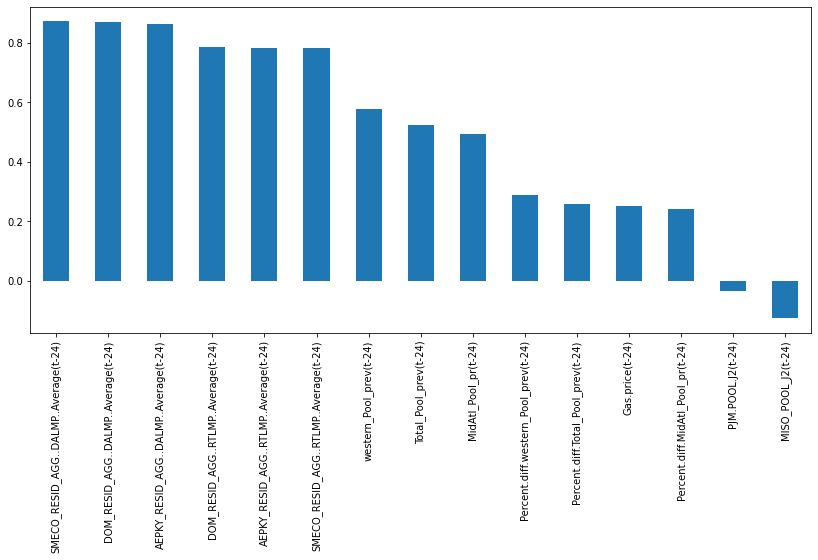

In [0]:
corr_price = reframed.drop(columns=['DOM_RESID_AGG..DALMP..Average(t)','AEPKY_RESID_AGG..DALMP..Average(t)' ]).corr(method='spearman')["SMECO_RESID_AGG..DALMP..Average(t)"].sort_values(ascending=False)
plt.figure(figsize=(14,6))
corr_price.drop("SMECO_RESID_AGG..DALMP..Average(t)").plot.bar()
plt.show();

In [0]:
#Code for indidual regression
import scipy
df1=reframed.drop(columns=['DOM_RESID_AGG..DALMP..Average(t)','AEPKY_RESID_AGG..DALMP..Average(t)'])
demand_r = {}
col=[]
val=[]
for col in df1.drop(columns=['SMECO_RESID_AGG..DALMP..Average(t)']).columns:
 #if col != 'SMECO_RESID_AGG..RTLMP..Average(t)':
  slope, intercept, r_value, p_value, std_err = scipy.stats.stats.linregress(df1[col], df1['SMECO_RESID_AGG..DALMP..Average(t)'])
  demand_r[col] = r_value**2
 # print( demand_r[col])




In [0]:
demand_r_df = pd.DataFrame({'col': list(demand_r.keys()), 'r^2': list(demand_r.values())})
print(demand_r_df.sort_values(by='r^2', ascending=False))
#demand_r_df

                                      col       r^2
3   SMECO_RESID_AGG..DALMP..Average(t-24)  5.97e-01
5   AEPKY_RESID_AGG..DALMP..Average(t-24)  5.74e-01
4     DOM_RESID_AGG..DALMP..Average(t-24)  5.49e-01
8                 western_Pool_prev(t-24)  2.73e-01
1     DOM_RESID_AGG..RTLMP..Average(t-24)  2.11e-01
2   AEPKY_RESID_AGG..RTLMP..Average(t-24)  2.09e-01
0   SMECO_RESID_AGG..RTLMP..Average(t-24)  2.05e-01
9                   Total_Pool_prev(t-24)  1.99e-01
7                    MidAtl_Pool_pr(t-24)  1.73e-01
11   Percent.diff.western_Pool_prev(t-24)  5.07e-02
10      Percent.diff.MidAtl_Pool_pr(t-24)  4.34e-02
6                         Gas.price(t-24)  3.96e-02
14                     MISO_POOL_J2(t-24)  1.29e-02
12     Percent.diff.Total_Pool_prev(t-24)  1.81e-03
13                      PJM.POOL.J2(t-24)  1.39e-04


#### 3.1.3.2 For DOM

In [0]:
# Code to produce figure 2
print('Lag correlations with DOM_RESID_AGG..DALMP..Average(t) ')
print(reframed.drop(columns=['SMECO_RESID_AGG..DALMP..Average(t)','AEPKY_RESID_AGG..DALMP..Average(t)']).corr()['DOM_RESID_AGG..DALMP..Average(t)'].sort_values(ascending=False)[1:])

Lag correlations with DOM_RESID_AGG..DALMP..Average(t) 
AEPKY_RESID_AGG..DALMP..Average(t-24)    0.75
DOM_RESID_AGG..DALMP..Average(t-24)      0.75
SMECO_RESID_AGG..DALMP..Average(t-24)    0.74
western_Pool_prev(t-24)                  0.49
DOM_RESID_AGG..RTLMP..Average(t-24)      0.45
AEPKY_RESID_AGG..RTLMP..Average(t-24)    0.44
SMECO_RESID_AGG..RTLMP..Average(t-24)    0.43
Total_Pool_prev(t-24)                    0.41
MidAtl_Pool_pr(t-24)                     0.39
Percent.diff.western_Pool_prev(t-24)     0.20
Percent.diff.MidAtl_Pool_pr(t-24)        0.19
Gas.price(t-24)                          0.18
Percent.diff.Total_Pool_prev(t-24)       0.04
PJM.POOL.J2(t-24)                       -0.01
MISO_POOL_J2(t-24)                      -0.11
Name: DOM_RESID_AGG..DALMP..Average(t), dtype: float64


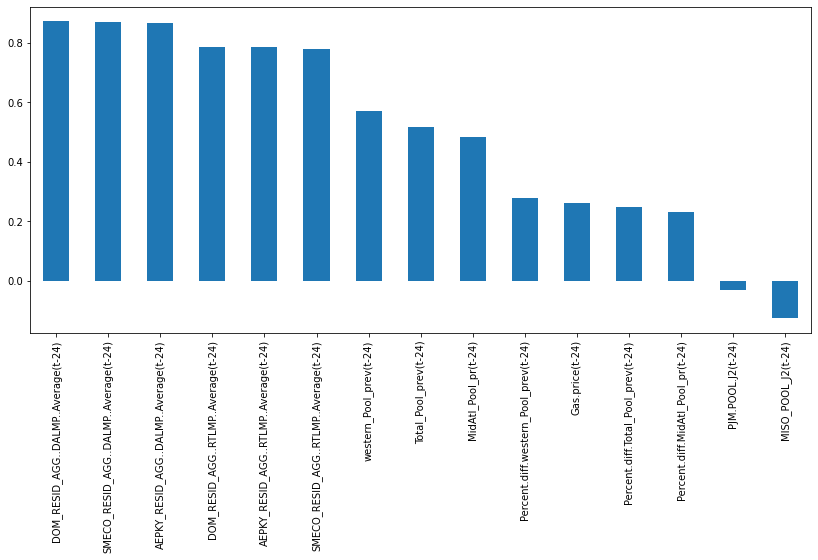

In [0]:
corr_price = reframed.drop(columns=['SMECO_RESID_AGG..DALMP..Average(t)','AEPKY_RESID_AGG..DALMP..Average(t)' ]).corr(method='spearman')["DOM_RESID_AGG..DALMP..Average(t)"].sort_values(ascending=False)
plt.figure(figsize=(14,6))
corr_price.drop("DOM_RESID_AGG..DALMP..Average(t)").plot.bar()
plt.show();

In [0]:
#Code for indidual regression
import scipy
df1=reframed.drop(columns=['SMECO_RESID_AGG..DALMP..Average(t)','AEPKY_RESID_AGG..DALMP..Average(t)'])
demand_r = {}
col=[]
val=[]
for col in df1.drop(columns=['DOM_RESID_AGG..DALMP..Average(t)']).columns:
 #if col != 'SMECO_RESID_AGG..RTLMP..Average(t)':
  slope, intercept, r_value, p_value, std_err = scipy.stats.stats.linregress(df1['DOM_RESID_AGG..DALMP..Average(t)'], df1[col])
  demand_r[col] = r_value**2
 # print( demand_r[col])

In [0]:
demand_r_df = pd.DataFrame({'col': list(demand_r.keys()), 'r^2': list(demand_r.values())})
print(demand_r_df.sort_values(by='r^2', ascending=False))

                                      col       r^2
5   AEPKY_RESID_AGG..DALMP..Average(t-24)  5.58e-01
4     DOM_RESID_AGG..DALMP..Average(t-24)  5.57e-01
3   SMECO_RESID_AGG..DALMP..Average(t-24)  5.55e-01
8                 western_Pool_prev(t-24)  2.41e-01
1     DOM_RESID_AGG..RTLMP..Average(t-24)  2.07e-01
2   AEPKY_RESID_AGG..RTLMP..Average(t-24)  1.95e-01
0   SMECO_RESID_AGG..RTLMP..Average(t-24)  1.86e-01
9                   Total_Pool_prev(t-24)  1.71e-01
7                    MidAtl_Pool_pr(t-24)  1.49e-01
11   Percent.diff.western_Pool_prev(t-24)  4.04e-02
10      Percent.diff.MidAtl_Pool_pr(t-24)  3.52e-02
6                         Gas.price(t-24)  3.27e-02
14                     MISO_POOL_J2(t-24)  1.29e-02
12     Percent.diff.Total_Pool_prev(t-24)  1.44e-03
13                      PJM.POOL.J2(t-24)  1.83e-04


#### 3.1.3.3 For ASEPKY

In [0]:
# Code to produce figure 2
print('Lag correlations with AEPKY_RESID_AGG..DALMP..Average(t)')
print(reframed.drop(columns=['SMECO_RESID_AGG..DALMP..Average(t)','DOM_RESID_AGG..DALMP..Average(t)']).corr()['AEPKY_RESID_AGG..DALMP..Average(t)'].sort_values(ascending=False)[1:])

Lag correlations with AEPKY_RESID_AGG..DALMP..Average(t)
AEPKY_RESID_AGG..DALMP..Average(t-24)    0.79
SMECO_RESID_AGG..DALMP..Average(t-24)    0.74
DOM_RESID_AGG..DALMP..Average(t-24)      0.73
western_Pool_prev(t-24)                  0.55
AEPKY_RESID_AGG..RTLMP..Average(t-24)    0.47
Total_Pool_prev(t-24)                    0.46
DOM_RESID_AGG..RTLMP..Average(t-24)      0.44
SMECO_RESID_AGG..RTLMP..Average(t-24)    0.43
MidAtl_Pool_pr(t-24)                     0.43
Percent.diff.western_Pool_prev(t-24)     0.22
Gas.price(t-24)                          0.21
Percent.diff.MidAtl_Pool_pr(t-24)        0.20
Percent.diff.Total_Pool_prev(t-24)       0.04
PJM.POOL.J2(t-24)                       -0.02
MISO_POOL_J2(t-24)                      -0.10
Name: AEPKY_RESID_AGG..DALMP..Average(t), dtype: float64


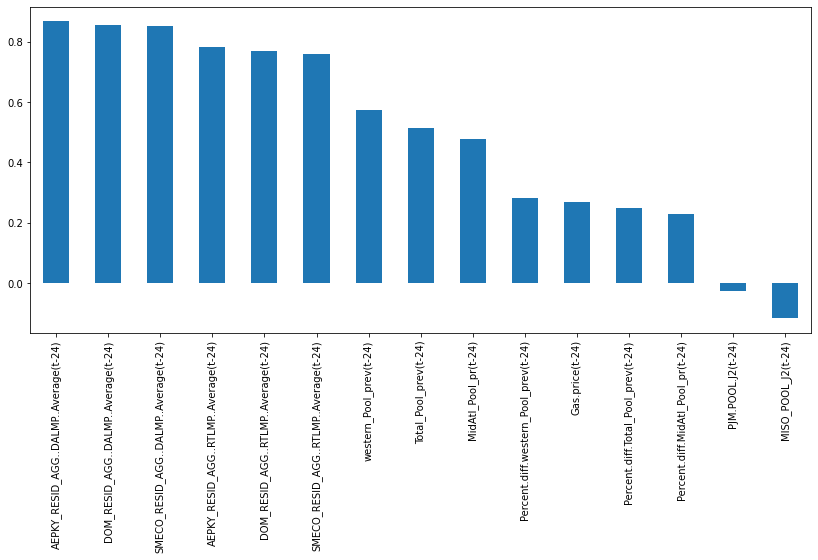

In [0]:
corr_price = reframed.drop(columns=['DOM_RESID_AGG..DALMP..Average(t)','SMECO_RESID_AGG..DALMP..Average(t)' ]).corr(method='spearman')["AEPKY_RESID_AGG..DALMP..Average(t)"].sort_values(ascending=False)
plt.figure(figsize=(14,6))
corr_price.drop("AEPKY_RESID_AGG..DALMP..Average(t)").plot.bar()
plt.show();

In [0]:
#Code for indidual regression
import scipy
df1=reframed.drop(columns=['SMECO_RESID_AGG..DALMP..Average(t)','DOM_RESID_AGG..DALMP..Average(t)'])
demand_r = {}
col=[]
val=[]
for col in df1.drop(columns=['AEPKY_RESID_AGG..DALMP..Average(t)']).columns:
 #if col != 'SMECO_RESID_AGG..RTLMP..Average(t)':
  slope, intercept, r_value, p_value, std_err = scipy.stats.stats.linregress(df1[col], df1['AEPKY_RESID_AGG..DALMP..Average(t)'])
  demand_r[col] = r_value**2
 # print( demand_r[col])

In [0]:
demand_r_df = pd.DataFrame({'col': list(demand_r.keys()), 'r^2': list(demand_r.values())})
print(demand_r_df.sort_values(by='r^2', ascending=False))

                                      col       r^2
5   AEPKY_RESID_AGG..DALMP..Average(t-24)  6.24e-01
3   SMECO_RESID_AGG..DALMP..Average(t-24)  5.47e-01
4     DOM_RESID_AGG..DALMP..Average(t-24)  5.35e-01
8                 western_Pool_prev(t-24)  2.99e-01
2   AEPKY_RESID_AGG..RTLMP..Average(t-24)  2.22e-01
9                   Total_Pool_prev(t-24)  2.14e-01
1     DOM_RESID_AGG..RTLMP..Average(t-24)  1.98e-01
0   SMECO_RESID_AGG..RTLMP..Average(t-24)  1.87e-01
7                    MidAtl_Pool_pr(t-24)  1.84e-01
11   Percent.diff.western_Pool_prev(t-24)  4.80e-02
6                         Gas.price(t-24)  4.32e-02
10      Percent.diff.MidAtl_Pool_pr(t-24)  3.88e-02
14                     MISO_POOL_J2(t-24)  1.09e-02
12     Percent.diff.Total_Pool_prev(t-24)  1.70e-03
13                      PJM.POOL.J2(t-24)  4.63e-04


## 3.2 Model Training & Testing

### 3.2.1 Code for Model evaluation 

In [0]:
def evaluate(model, X_test, y_test, X_train, y_train, m_name):
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    # Compute and print the metrics
    r2_test = model.score(X_test, y_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    
    r2_train = model.score(X_train, y_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    
    print(' ',m_name)
    
    print('---------------------')
    print('Train R^2: %.4f' % r2_train)
    print ('Train Root MSE: %.4f' % rmse_train)

    print ('---------------------')
    print ('Test R^2: %.4f' % r2_test)
    print ('Test Root MSE: %.4f' % rmse_test)

    return r2_test, rmse_test

### 3.2.2 Model Fitting

In [0]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

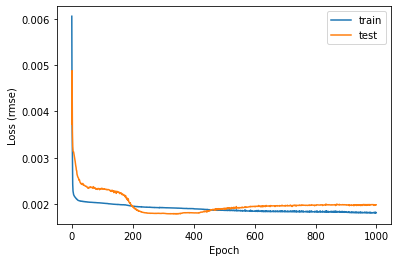

In [0]:
np.random.seed(4230)
nb_neuronnes= 5
model = Sequential()
model.add(Dense(nb_neuronnes, activation='relu', input_dim=n_input))
#model.add(Dense(nb_neuronnes, activation='relu', input_dim=nb_neuronnes))
##model.add(Dense(nb_neuronnes, input_dim=nb_neuronnes))
#model.add(Dense(nb_neuronnes, input_dim=nb_neuronnes))
model.add(Dense(nb_neuronnes, activation='relu', input_dim=nb_neuronnes))
model.add(Dense(nb_neuronnes,activation='relu', input_dim=nb_neuronnes))
model.add(Dense(n_output))
model.compile(optimizer='Adam', loss='mean_squared_error') # mean_squared_error mean_absolute_error

#model.compile(loss='mean_squared_error', optimizer='RMSprop') #sgd Adadelta RMSprop; selection: epochs=30, Adam, batch=32
# fit network
##history = model.fit(train_X, train_y, epochs=30, batch_size=32, validation_data=(test_X, test_y), verbose=0, shuffle=False)

# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=1000)
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=0, save_best_only=True)

###history=model.fit(X_Train, y_Train, epochs=1000, verbose=0, shuffle=False, validation_data=(X_Test, y_Test), callbacks=[es, mc])
history=model.fit(features_train, label_train, epochs=1000, verbose=0, shuffle=False, validation_data=(features_test, label_test), callbacks=[es, mc])
#history=model.fit(X_Train, y_Train, epochs=100, verbose=0, shuffle=False, validation_data=(X_Test, y_Test))
##history = model.fit(X_train_scaled, y_train_scaled, epochs=30, batch_size=32, validation_data=(X_test, y_test), verbose=0, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('Epoch')
plt.ylabel('Loss (rmse)')
plt.legend()

### 3.2.3 Training performance

In [0]:
label_train_scaled= model.predict(features_train)
train_array=hstack((features_train,label_train_scaled))
label_train_pred=scaler.inverse_transform(train_array)[:,-n_output:]
label_train_pred=pd.DataFrame(label_train_pred)
##label_train_pred=label_train_scaled
label_train_pred

,0,1,2
0,23.079851,18.327294,23.192266
1,23.139924,18.370071,23.255354
2,22.982331,18.257848,23.089847
3,23.130865,18.363620,23.245840
4,23.327995,18.503996,23.452869
...,...,...,...
13459,26.187076,20.539953,26.455519
13460,28.923687,22.488698,29.329552
13461,30.764583,23.799604,31.262891
13462,34.448280,26.422771,35.131569


In [0]:
y_Train

array([[23.5 , 23.6 , 23.83],
       [23.16, 23.28, 23.58],
       [23.07, 23.22, 23.53],
       ...,
       [48.95, 49.49, 53.27],
       [47.12, 47.64, 51.46],
       [39.45, 40.21, 42.71]])

In [0]:
rsq = r2_score(label_train_pred, y_Train)
rmse = np.sqrt(mean_squared_error(label_train_pred, y_Train))
mae= mean_absolute_error(label_train_pred, y_Train)
print('Training r^2: %.5f' % rsq)
print('Training RMSE: %.5f' % rmse)
print('Training MAE: %.5f' % mae)

Training r^2: -0.42974
Training RMSE: 9.52258
Training MAE: 5.89678


In [0]:
label_x=np.arange(0, len(features_train))
label_x

array([    0,     1,     2, ..., 13461, 13462, 13463])

In [0]:
target=['SMECO_RESID_AGG..DALMP..Average(t)','DOM_RESID_AGG..DALMP..Average(t)','AEPKY_RESID_AGG..DALMP..Average(t)']

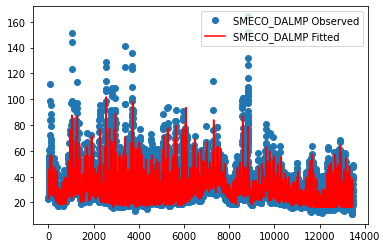

In [0]:
 plt.plot(label_x, y_Train[:,0], 'o', label='SMECO_DALMP Observed')
 plt.plot(label_x, label_train_pred.iloc[:,0], 'r', label='SMECO_DALMP Fitted')
 plt.legend()
 plt.show()

In [0]:
YY_Train=pd.DataFrame(y_Train)
YY_Train

,0,1,2
0,23.50,23.60,23.83
1,23.16,23.28,23.58
2,23.07,23.22,23.53
3,23.17,23.32,23.66
4,23.29,23.47,23.81
...,...,...,...
13459,38.13,38.68,43.39
13460,40.65,41.53,45.56
13461,48.95,49.49,53.27
13462,47.12,47.64,51.46


In [0]:
data_train=pd.DataFrame()
data_train['predicted prices ($/MW)']= label_train_pred.iloc[:,0][:-1]
data_train['Real prices ($/MW)']= YY_Train.iloc[:,0][:-1]
data_train

,predicted prices ($/MW),Real prices ($/MW)
0,23.079851,23.50
1,23.139924,23.16
2,22.982331,23.07
3,23.130865,23.17
4,23.327995,23.29
...,...,...
13458,24.093637,38.47
13459,26.187076,38.13
13460,28.923687,40.65
13461,30.764583,48.95


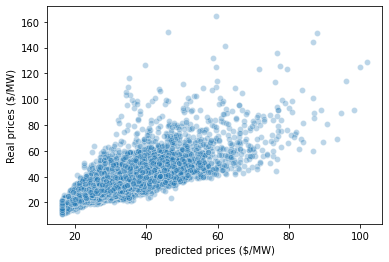

In [0]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x="predicted prices ($/MW)", y="Real prices ($/MW)",
    ##hue="features",
    ##palette=sns.color_palette("hls", 10),
    data=data_train,
    legend="full",
    alpha=0.3
)

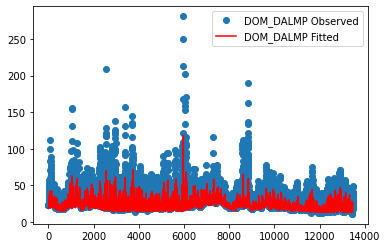

In [0]:
plt.plot(label_x, y_Train[:,1], 'o', label='DOM_DALMP Observed')
plt.plot(label_x, label_train_pred.iloc[:,1], 'r', label='DOM_DALMP Fitted')
plt.legend()
plt.show()

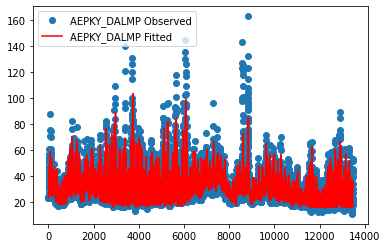

In [0]:
plt.plot(label_x, y_Train[:,2], 'o', label='AEPKY_DALMP Observed')
plt.plot(label_x, label_train_pred.iloc[:,2], 'r', label='AEPKY_DALMP Fitted')
plt.legend()
plt.show()

### 3.2.4 Testing performance

In [0]:
label_pred_scaled= model.predict(features_test)
pred_array=hstack((features_test,label_pred_scaled))
label_pred=scaler.inverse_transform(pred_array)[:,-n_output:]
label_pred=pd.DataFrame(label_pred)
##label_pred= label_pred_scaled
label_pred
#pd.DataFrame(label_pred)

,0,1,2
0,29.857348,23.153560,30.310098
1,28.403800,22.118486,28.783558
2,26.190476,20.542375,26.459093
3,23.534929,18.651354,23.670193
4,21.002799,16.848221,21.010912
...,...,...,...
3361,25.616545,20.133677,25.856339
3362,24.319079,19.209749,24.493721
3363,22.984625,18.259482,23.092256
3364,20.867317,16.751743,20.868626


In [0]:
y_Test

array([[38.18, 38.37, 38.61],
       [36.59, 36.74, 36.86],
       [29.36, 29.43, 29.61],
       ...,
       [17.64, 17.45, 17.7 ],
       [15.81, 15.73, 16.02],
       [15.33, 15.19, 15.58]])

In [0]:
rsq = r2_score(label_pred, y_Test)
rmse = np.sqrt(mean_squared_error(label_pred, y_Test))
mae= mean_absolute_error(label_pred, y_Test)
print('Test r^2: %.5f' % rsq)
print('Test RMSE: %.5f' % rmse)
print('Test MAE: %.5f' % mae)

Test r^2: 0.10658
Test RMSE: 7.09652
Test MAE: 4.74792


In [0]:
label_x_test=np.arange(0, len(y_Test))
label_x_test

array([   0,    1,    2, ..., 3363, 3364, 3365])

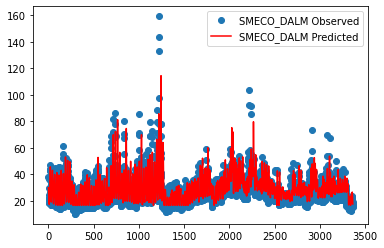

In [0]:
plt.plot(label_x_test, y_Test[:,0], 'o', label='SMECO_DALM Observed')
plt.plot(label_x_test, label_pred.iloc[:,0], 'r', label='SMECO_DALM Predicted')
plt.legend()
plt.show()

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
YY_Test=pd.DataFrame(y_Test)
YY_Test

,0,1,2
0,38.18,38.37,38.61
1,36.59,36.74,36.86
2,29.36,29.43,29.61
3,24.35,24.22,24.30
4,22.44,22.37,22.24
...,...,...,...
3361,21.10,20.71,20.72
3362,19.40,19.19,19.43
3363,17.64,17.45,17.70
3364,15.81,15.73,16.02


In [0]:
data_test=pd.DataFrame()
data_test['predicted prices ($/MW)']= label_pred.iloc[:,0][:-1]
data_test['Real prices ($/MW)']= YY_Test.iloc[:,0][:-1]
data_test

,predicted prices ($/MW),Real prices ($/MW)
0,29.857348,38.18
1,28.403800,36.59
2,26.190476,29.36
3,23.534929,24.35
4,21.002799,22.44
...,...,...
3360,26.247442,22.69
3361,25.616545,21.10
3362,24.319079,19.40
3363,22.984625,17.64


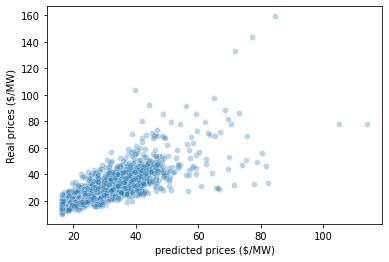

In [0]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x="predicted prices ($/MW)", y="Real prices ($/MW)",
    ##hue="features",
    ##palette=sns.color_palette("hls", 10),
    data=data_test,
    legend="full",
    alpha=0.3
)

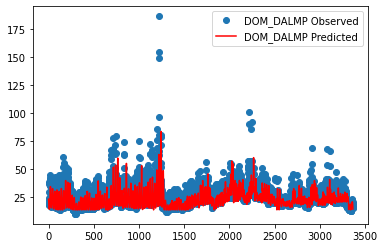

In [0]:
plt.plot(label_x_test, y_Test[:,1], 'o', label='DOM_DALMP Observed')
plt.plot(label_x_test, label_pred.iloc[:,1], 'r', label='DOM_DALMP Predicted')
plt.legend()
plt.show()

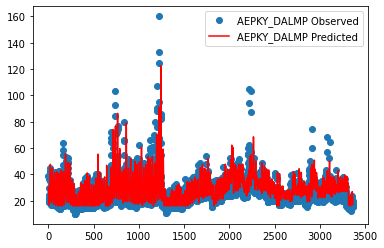

In [0]:
plt.plot(label_x_test, y_Test[:,2], 'o', label='AEPKY_DALMP Observed')
plt.plot(label_x_test, label_pred.iloc[:,2], 'r', label='AEPKY_DALMP Predicted')
plt.legend()
plt.show()